In [1]:
# Import libraries

%matplotlib widget

import winsound

CFREQ = 523
DFREQ = 261
DUR = 200

import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
import pandas as pd
from math import floor

from __future__ import division
from numpy import linspace, loadtxt, ones, convolve

def MovingAverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


def GetInfo(stringName):
    data = h5py.File(stringName, "r") #the path of the dataset
    a = np.array(data['/x'])
    b = np.array(data['/y'])
    data.close()
    return a,b

def GetMaxValueMaxIndex(values,repeat):
    max_values = []
    max_indices = []
    for i in range(0, floor(len(values)/repeat),1):
        segment = values[floor(i * repeat) : floor((i+1) * repeat)]
        max_value = np.max(segment)
        max_index = np.argmax(segment) + floor(i * repeat)  # Add i to get the absolute index in the original array
        max_values.append(max_value)
        max_indices.append(max_index)
    max_values = np.array(max_values)
    max_indices = np.array(max_indices)
    return max_values, max_indices



def isNumber(chain):
    for char in chain:
        if ((not char.isdigit()) and (not char == ".")):
            return False

    return True




def AskInput(expectedType):
    winsound.Beep(CFREQ,DUR)
    winsound.Beep(DFREQ,DUR)
    cycle = True
    while cycle:
        value = input()
        if expectedType == int or expectedType == float:
            if not isNumber(value):
                print("Wrong input, try again")
            else:
                print("Your input is: " + str(value) + ". Do you want to change it? (y=yes,n=no)")
                check = input()
                if check == 'n':
                    cycle = False
                    return value
        else:
            print("Your input is: " + str(value) + ". Do you want to change it? (y=yes,n=no)")
            check = input()
            if check == 'n':
                cycle = False
                return value


winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [2]:
print("Number of folders: ")
numberFolders = int(AskInput(int))

numberFiles = []

for i in range(0,numberFolders):
    print("Files in folder " + str(i) + ": ")
    numberFiles.append(int(AskInput(int)))

print("This program creates files as an output. Where do you want it to place them (folder path)?: ")
savePath = AskInput(str)+ "\\"
savePath.replace("\\", "\\\\")

print("Common name of files (all files mmust have smthg in common (e.g: B_1, B_2): ")
commonName = AskInput(str)

print("Minimum frequency of interest of interferometer (MHz): ")
minFreqIntPlot = float((AskInput(float)))
    
print("Maximum freq int interf (MHz): ")
maxFreqIntPlot = float((AskInput(float)))

print("Sampling frequency (MHz): ")
fs = float((AskInput(float)))

# There is a number of folders, one for each setup of the experiment (opposite B measuring X intensity, op B meas Y,
# colinear B meas X, col B meas Y).
#Each folder has two files, B_1, B_2.


Number of folders: 


 1


Your input is: 1. Do you want to change it? (y=yes,n=no)


 y
 2


Your input is: 2. Do you want to change it? (y=yes,n=no)


 n


Files in folder 0: 


 30


Your input is: 30. Do you want to change it? (y=yes,n=no)


 n


Files in folder 1: 


 30


Your input is: 30. Do you want to change it? (y=yes,n=no)


 n


This program creates files as an output. Where do you want it to place them (folder path)?: 


 C:\Users\Óscar\Desktop\DCS\Pruebasd2d2


Your input is: C:\Users\Óscar\Desktop\DCS\Pruebasd2d2. Do you want to change it? (y=yes,n=no)


 n


Common name of files (all files mmust have smthg in common (e.g: B_1, B_2): 


 B_


Your input is: B_. Do you want to change it? (y=yes,n=no)


 n


Minimum frequency of interest of interferometer (MHz): 


 22


Your input is: 22. Do you want to change it? (y=yes,n=no)


 y
 0


Your input is: 0. Do you want to change it? (y=yes,n=no)


 n


Maximum freq int interf (MHz): 


 100


Your input is: 100. Do you want to change it? (y=yes,n=no)


 n


Sampling frequency (MHz): 


 100


Your input is: 100. Do you want to change it? (y=yes,n=no)


 n


In [ ]:
print("Minimum frequency of interest of interferometer (MHz): ")
minFreqIntPlot = float((AskInput(float)))
    
print("Maximum freq int interf (MHz): ")
maxFreqIntPlot = float((AskInput(float)))


Folder 1 path: 


 C:\Users\Óscar\Desktop\DCS\662nm_amp\2024_09_05_15h_42m_12s\Digitizer1


Your input is: C:\Users\Óscar\Desktop\DCS\662nm_amp\2024_09_05_15h_42m_12s\Digitizer1. Do you want to change it? (y=yes,n=no)


 n


Desired plot name: 


 Spectrometry result for 662 nm


Your input is: Spectrometry result for 662 nm. Do you want to change it? (y=yes,n=no)


 n


Accessing folder 1 file 1
Accessing folder 1 file 2
Accessing folder 1 file 3
Accessing folder 1 file 4
Accessing folder 1 file 5
Accessing folder 1 file 6
Accessing folder 1 file 7
Accessing folder 1 file 8
Accessing folder 1 file 9
Accessing folder 1 file 10
Accessing folder 1 file 11
Accessing folder 1 file 12
Accessing folder 1 file 13
Accessing folder 1 file 14
Accessing folder 1 file 15
Accessing folder 1 file 16
Accessing folder 1 file 17
Accessing folder 1 file 18
Accessing folder 1 file 19
Accessing folder 1 file 20
Accessing folder 1 file 21
Accessing folder 1 file 22
Accessing folder 1 file 23
Accessing folder 1 file 24
Accessing folder 1 file 25
Accessing folder 1 file 26
Accessing folder 1 file 27
Accessing folder 1 file 28
Accessing folder 1 file 29
Accessing folder 1 file 30
Output file name: 


 prueba


Your input is: prueba. Do you want to change it? (y=yes,n=no)


 n


['C:\\Users\\Óscar\\Desktop\\DCS\\Pruebasd2d2\\prueba.h5']
Folder 2 path: 


 C:\Users\Óscar\Desktop\DCS\662nm_no_amp_samepower\2024_09_05_15h_48m_59s\Digitizer1


Your input is: C:\Users\Óscar\Desktop\DCS\662nm_no_amp_samepower\2024_09_05_15h_48m_59s\Digitizer1. Do you want to change it? (y=yes,n=no)


 n


Desired plot name: 


 Spectrometry result for 662 nm, no Amp


Your input is: Spectrometry result for 662 nm, no Amp. Do you want to change it? (y=yes,n=no)


 n


Accessing folder 2 file 1
Accessing folder 2 file 2
Accessing folder 2 file 3
Accessing folder 2 file 4
Accessing folder 2 file 5
Accessing folder 2 file 6
Accessing folder 2 file 7
Accessing folder 2 file 8
Accessing folder 2 file 9
Accessing folder 2 file 10
Accessing folder 2 file 11
Accessing folder 2 file 12
Accessing folder 2 file 13
Accessing folder 2 file 14
Accessing folder 2 file 15
Accessing folder 2 file 16
Accessing folder 2 file 17
Accessing folder 2 file 18
Accessing folder 2 file 19
Accessing folder 2 file 20
Accessing folder 2 file 21
Accessing folder 2 file 22
Accessing folder 2 file 23
Accessing folder 2 file 24
Accessing folder 2 file 25
Accessing folder 2 file 26
Accessing folder 2 file 27
Accessing folder 2 file 28
Accessing folder 2 file 29
Accessing folder 2 file 30
Output file name: 


 prueba2


Your input is: prueba2. Do you want to change it? (y=yes,n=no)


 n


['C:\\Users\\Óscar\\Desktop\\DCS\\Pruebasd2d2\\prueba.h5', 'C:\\Users\\Óscar\\Desktop\\DCS\\Pruebasd2d2\\prueba2.h5']


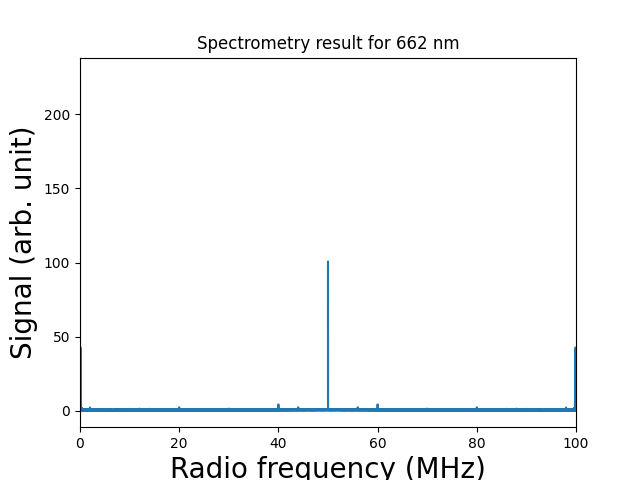

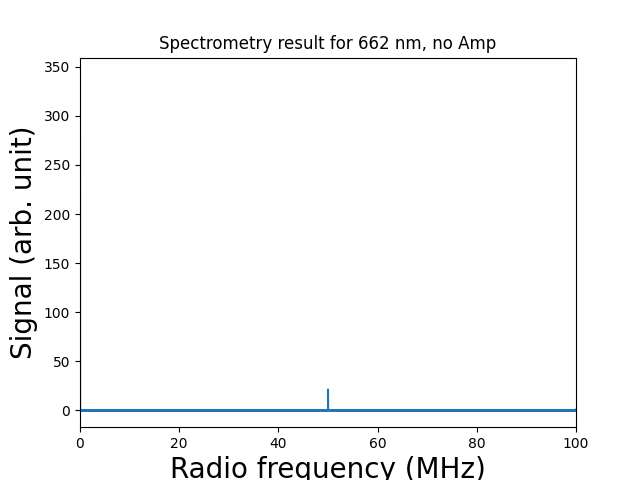

In [4]:
#This is a for which asks for the folders and files. It calculates the FFT of each file and adds it up, then creates a folder
#for each different exp setup.

outputFileName = []

for i in range (1,numberFolders+1):

    #Ask for folder of the setup
    print("Folder "+ str(i) +" path: ")
    folderPath = AskInput(str) + "\\"
    folderPath = folderPath.replace("\\", "\\\\")  #Python works with \\ instad of \

    
    print("Desired plot name: ")
    plotName = AskInput(str)

    
    #Create a void variable to clean previous data
    ffts = None

    
    for j in range (1,numberFiles[i-1]+1):

        #Access folder
        
        print("Accessing folder " +str(i) + " file " + str(j))
        filePath = folderPath + commonName + str(j) + ".h5"
        data =h5py.File(filePath, "r")

        #Perform FFT
        signal = np.array(data['/B_' + str(j)])
        fft_signal = np.abs(fft(signal))

        #Stablish void variable as an array of zeros to avoid array-dimensional problems
        if ffts is None:
            ffts = np.zeros_like(fft_signal)

        ffts += fft_signal

        #Close file
        data.close()
        del signal

    #Average: there are numberFiles measurements per exp setup
    ffts = ffts/numberFiles[i-1]


    #Normalize
    ffts = np.array(ffts)
    ffts = ffts/len(ffts)
    nfft = len(ffts)

    #Vector of frequencies: the X axis
    fvec = np.linspace(0,fs,nfft)


    #Plot results
    plt.figure()
    plt.title(plotName)
    plt.plot(fvec,ffts)
    plt.ylabel('Signal (arb. unit)',fontsize=20)
    plt.xlabel('Radio frequency (MHz)',fontsize=20)
    plt.xlim([minFreqIntPlot, maxFreqIntPlot])


    #Save results of the region of interest in MHz in a file
    fftsfin = ffts [int(minFreqIntPlot*10**3) : int(maxFreqIntPlot*10**3)]
    fvecfin = fvec [int(minFreqIntPlot*10**3) : int(maxFreqIntPlot*10**3)]
    
    print("Output file name: ")
    outputFileName.append(savePath + AskInput(str) + ".h5")

    print(outputFileName)
    
    with h5py.File(outputFileName[i-1], "w") as f:
        dset = f.create_dataset("x",data = fvecfin)
        dset = f.create_dataset("y", data=fftsfin)
    
winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
#Initial information about the experiment

print("Repetition rate of FIRST comb (MHz): ")
f_rep1 = float(AskInput(float)) * 10**6

print("Repetition rate of SECOND comb (MHz): ")
f_rep2 = float(AskInput(float)) * 10**6

print("Off-set frequency (MHz): ")
f_ceo = float(AskInput(float)) * 10 ** 6

print("Approx example optical frequency (THz): ")
f_opt_wanted = float(AskInput(float)) * 10 **12

df_rep = abs(f_rep2 - f_rep1) #difference between two combs

f_unamb = (f_rep1 ** 2)/(2 * df_rep) #unambiguity range


#Finding  the order of the region 
    
for i in range (1,10):
    if f_opt_wanted < i * f_unamb:
        unamb_n = i 
        break

print("Difference between frequency of combs: " + str(df_rep))
print('The unambiguity range is',f_unamb / 10 ** 12,'THz')
print('The order of the unambiguity region is',unamb_n)

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:

###### FOR DEBUGGING PURPOSES ONLY ###########

outputFileName = ["C:\\Users\\Oscar\\Desktop\\Test_Data\\SavedData\\col_x.h5","C:\\Users\\Oscar\\Desktop\\Test_Data\\SavedData\\col_y.h5","C:\\Users\\Oscar\\Desktop\\Test_Data\\SavedData\\op_y.h5","C:\\Users\\Oscar\\Desktop\\Test_Data\\SavedData\\op_x.h5"]


In [ ]:
print(outputFileName)

In [ ]:
# Converting the radio domain back to the optical domain (MHz --> THz)

print("Converting rf to optical domain and saving in new files.")

nameNewOutput = []

for k in range(1,numberFolders+1):

    #Open the file with data in radio frequencies

    print("Now converting: " + outputFileName[k-1])
    
    fvec,ffts = GetInfo(outputFileName[k-1])
    
    fr = fvec * 10 ** 6  #array of frequencies taken from the real data
    f_opt = [0 for i in range(len(fr))]  #new array for the optical wavelengths
    
    
    for l in range (len(fr)): #transferring each element of the fr (which is in Hz) to the optical frequency and writing into f_opt
        if (unamb_n % 2) == 0:
            n = (((f_rep1) / 2) - fr[l]) / df_rep
        else:
             n = fr[l] / df_rep
        nreg = (f_rep1 / 2) / df_rep 
        n = n + (unamb_n - 1) * nreg 
        f_opt[l] = (n * f_rep1) / 10 ** 12



    f_opt = np.array(f_opt)

    fftsfin = ffts
    fvecfin = f_opt

    outputFileName[k-1] = outputFileName[k-1].replace(".h5","THz.h5")

    print(fvecfin)
    print(fftsfin)

    fftsfin = fftsfin/max(fftsfin)
    
    with h5py.File(outputFileName[k-1], 'w') as f:
        dset = f.create_dataset("x",data = fvecfin)
        dset = f.create_dataset("y", data = fftsfin)


winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
#Get plots of intensities vs frequency in THz for all setups

window = 1

fvecArray = []
fftsArray = []
maxValueArray = []
maxIndexArray = []
avMax = []
intensityArray = []
df = df_rep

for i in range (0,numberFolders):
    tempX, tempY = GetInfo(outputFileName[i])
    fvecArray.append(tempX)
    fftsArray.append(tempY)
    
    tempX, tempY = GetMaxValueMaxIndex(fftsArray[i],df)
    maxValueArray.append(tempX)
    maxIndexArray.append(tempY)

    tempX = MovingAverage(maxValueArray[i],window)
    avMax.append(tempX)

    avMax[i] = avMax[i]/np.max(avMax[i])

    intensityArray.append(avMax[i]/np.max(avMax[i]))


winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
print(fvecArray[numToPlot][maxIndexArray[numToPlot]])

In [ ]:
#Plotting time! 

print("It's plotting time! We've got " + str(numberFolders) + " sets of data. How many FIGURES do you want? A figure is a set of plots!")
numberFigures = int(AskInput(int))

print("How many PLOTS do you want in each figure?")
numberPlots = int(AskInput(int))

for i in range (0,numberFigures):
    print("Title of the figure: ")
    plotTitle = AskInput(str)
    plt.figure()
    plt.title(plotTitle)
    for j in range (0,numberPlots):
        print("Number of dataset you want to plot. The order is the same of the files you input at the beginning: ")
        numToPlot = int(AskInput(int)) -1
        print("Label for this plot: ")
        labelOfPlot = AskInput(str)
        plt.plot(fvecArray[numToPlot][maxIndexArray[numToPlot]], avMax[numToPlot]/np.max(avMax[numToPlot]), label = labelOfPlot)
    
    plt.ylabel('Signal (arb. unit)',fontsize=20)
    plt.xlabel('Frequency (THz)',fontsize=20)
    plt.xlim(min(fvecArray[numToPlot][maxIndexArray[numToPlot]]),max(fvecArray[numToPlot][maxIndexArray[numToPlot]]))
    plt.ticklabel_format(useOffset=False)
    plt.legend( loc='upper left')

plt.show()

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)


In [ ]:
#Intensity and rotations vs frequency for Colinear Magnets

###################################################################################################################
# ONLY EXECUTE THIS CELL IF YOU'RE WORKING WITH X AND Y MEASUREMENTS OF INTENSITY

print("Which number of folder corresponds to colinear magnets, x intensity?")
folColX = int(AskInput(int)) -1
avMaxColX = avMax[folColX]
IColX = intensityArray[folColX]
fvecColX = fvecArray[folColX]
maxIndexColX = maxIndexArray[folColX]

print("Which number of folder corresponds to colinear magnets, y intensity?")
folColY = int(AskInput(int)) -1
avMaxColY = avMax[folColY]
IColY = intensityArray[folColY]
fvecColY = fvecArray[folColY]
maxIndexColY = maxIndexArray[folColY]

avMaxSeparCol = avMaxColY - avMaxColX

angCol = (IColX - IColY)/(IColX + IColY)


c = 299792458
wavelengthsColX = c/(1000*fvecColX)   # Convert meters to nanometers
wavelengthsColY = c/(1000*fvecColY)

# Create the figure and gridspec
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)  # Ensure sharey=False to have independent y-limits

# Create a top x-axis for only the first subplot
top_ax = axs[0].twiny()

# Plotting the data
axs[1].plot(fvecColX[maxIndexColX], avMaxColX / np.max(avMaxColX), 'g', label='Horizontal component colinear magnets')
axs[0].plot(fvecColX[maxIndexColX], avMaxColY / np.max(avMaxColY), 'r', label='Vertical component colinear magnets')
axs[2].plot(fvecColX[maxIndexColX], angCol, label='Rotation colinear magnets')

# Adding legends
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

# Setting y-limits
axs[0].set_ylim([0, 1.1])
axs[1].set_ylim([0, 1.1])
axs[2].set_ylim([- 1.3,1.3])

# Hide x labels and tick labels for all but the bottom plot
for ax in axs:
    ax.label_outer()

# Setting x and y labels
axs[-1].set_xlabel('Frequency (THz)', fontsize=20)  # Set the x-label only on the bottom plot
fig.text(0.04, 0.5, 'Normalized Signal', va='center', rotation='vertical', fontsize=20)

# Setting x-limits
freq_xlim = [min(fvecColX[maxIndexColX]), max(fvecColX[maxIndexColX])]
axs[0].set_xlim(freq_xlim)

# Convert frequency limits to wavelength limits for the top axis
freq_xlim_hz = np.array(freq_xlim) * 1e12  # Convert THz to Hz
wavelength_xlim_m = c / freq_xlim_hz  # Wavelength in meters
wavelength_xlim_nm = wavelength_xlim_m * 1e9

top_ax.set_xlim(wavelength_xlim_nm)  # Set the top x-axis limits to the wavelength limits
top_ax.set_xlabel('Wavelength (nm)', fontsize=16)

# Make sure the top axis is visible
top_ax.xaxis.set_visible(True)

# Adjust tick labels format
for ax in axs:
    ax.ticklabel_format(useOffset=False)

plt.show()

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
#Intensity and rotations vs frequency for Opposite Magnets
##### OONLY EXECUTE IF SAME AS ABOVE

print("Which number of folder corresponds to opposite magnets, x intensity?")
folOpX = int(AskInput(int)) -1
avMaxOpX = avMax[folOpX]
IOpX = intensityArray[folOpX]
fvecOpX = fvecArray[folOpX]
maxIndexOpX = maxIndexArray[folOpX]



print("Which number of folder corresponds to opposite magnets, y intensity?")
folOpY = int(AskInput(int)) -1
avMaxOpY = avMax[folOpY]
IOpY = intensityArray[folOpY]
fvecOpY = fvecArray[folOpY]
maxIndexOpY = maxIndexArray[folOpY]

avMaxSeparOp = avMaxOpY - avMaxOpX

angOp = (IOpX - IOpY)/(IOpX + IOpY)


c = 299792458
wavelengthsOpX = c/(1000*fvecOpX)   # Convert meters to nanometers
wavelengthsOpY = c/(1000*fvecOpY)

# Create the figure and gridspec
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)  # Ensure sharey=False to have independent y-limits

# Create a top x-axis for only the first subplot
top_ax = axs[0].twiny()

# Plotting the data
axs[1].plot(fvecOpX[maxIndexOpX], avMaxOpX / np.max(avMaxOpX), 'g', label='Horizontal component opposite magnets')
axs[0].plot(fvecOpX[maxIndexOpX], avMaxOpY / np.max(avMaxOpY), 'r', label='Vertical component opposite magnets')
axs[2].plot(fvecOpX[maxIndexOpX], angOp, label='Rotation opposite magnets')

# Adding legends
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

# Setting y-limits
axs[0].set_ylim([0, 1.1])
axs[1].set_ylim([0, 1.1])
axs[2].set_ylim([- 1.3,1.3])

# Hide x labels and tick labels for all but the bottom plot
for ax in axs:
    ax.label_outer()

# Setting x and y labels
axs[-1].set_xlabel('Frequency (THz)', fontsize=20)  # Set the x-label only on the bottom plot
fig.text(0.04, 0.5, 'Normalized Signal', va='center', rotation='vertical', fontsize=20)

# Setting x-limits
freq_xlim = [min(fvecOpX[maxIndexOpX]), max(fvecOpX[maxIndexOpX])]
axs[0].set_xlim(freq_xlim)

# Convert frequency limits to wavelength limits for the top axis
freq_xlim_hz = np.array(freq_xlim) * 1e12  # Convert THz to Hz
wavelength_xlim_m = c / freq_xlim_hz  # Wavelength in meters
wavelength_xlim_nm = wavelength_xlim_m * 1e9

top_ax.set_xlim(wavelength_xlim_nm)  # Set the top x-axis limits to the wavelength limits
top_ax.set_xlabel('Wavelength (nm)', fontsize=16)

# Make sure the top axis is visible
top_ax.xaxis.set_visible(True)

# Adjust tick labels format
for ax in axs:
    ax.ticklabel_format(useOffset=False)

plt.show()

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
#Save rotation angles w.r.t frequency for each magnet positioning

rotationSaved = []
rotationSaved.append(savePath + "rotation_vs_frequency_col.h5")
rotationSaved.append(savePath + "rotation_vs_frequency_op.h5")

with h5py.File(rotationSaved[0], 'w') as f:
    dset = f.create_dataset("x",data = fvecColX[maxIndexColX])
    dset = f.create_dataset("y", data = angCol)

with h5py.File(rotationSaved[1], 'w') as f:
    dset = f.create_dataset("x",data = fvecOpX[maxIndexOpX])
    dset = f.create_dataset("y", data = angOp)

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
freqCol, rotationCol = GetInfo(rotationSaved[0])
freqOp, rotationOp = GetInfo(rotationSaved[1])

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
difer = rotationCol - rotationOp

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)

In [ ]:
# Create the figure and gridspec
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)  # Ensure sharey=False to have independent y-limits
#fig.suptitle('Samarium')

# Create a top x-axis for only the first subplot
top_ax = axs[0].twiny()

# Plotting the data
axs[1].plot(freqCol,rotationCol, 'g', label='Colinear magnets rotation')
axs[0].plot(freqOp,rotationOp, 'r', label='Opposite magnets rotation')
axs[2].plot(freqCol,difer, label='Difference')

# Adding legends
axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")
axs[2].legend(loc="upper right")

# Setting y-limits
axs[0].set_ylim([- 1.3,1.3])
axs[1].set_ylim([- 1.3,1.3])
axs[2].set_ylim([- 1.3,1.3])

# Hide x labels and tick labels for all but the bottom plot
for ax in axs:
    ax.label_outer()

# Setting x and y labels
axs[-1].set_xlabel('Frequency (THz)', fontsize=20)  # Set the x-label only on the bottom plot
fig.text(0.04, 0.5, 'Normalized Signal', va='center', rotation='vertical', fontsize=20)

# Setting x-limits
freq_xlim = [min(freqCol), max(freqCol)]
axs[0].set_xlim(freq_xlim)

# Convert frequency limits to wavelength limits for the top axis
freq_xlim_hz = np.array(freq_xlim) * 1e12  # Convert THz to Hz
wavelength_xlim_m = c / freq_xlim_hz  # Wavelength in meters
wavelength_xlim_nm = wavelength_xlim_m * 1e9 
#wavelength_xlim_nm = wavelength_xlim_nm[::-1]

top_ax.set_xlim(wavelength_xlim_nm)  # Set the top x-axis limits to the wavelength limits
top_ax.set_xlabel('Wavelength (nm)', fontsize=16)

# Make sure the top axis is visible
top_ax.xaxis.set_visible(True)

# Adjust tick labels format
for ax in axs:
    ax.ticklabel_format(useOffset=False)

plt.show()

winsound.Beep(CFREQ,DUR)
winsound.Beep(DFREQ,DUR)